# Linear Regression

This notebook is a an intuitive introduction to the concept of linear regression. Partially based on Chapter 10 in the book [**Statistics** by Freedman, Pisani and Purves](https://www.amazon.com/Statistics-4th-David-Freedman/dp/0393929728) 

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


## Small example
Suppose we have 9 points on the plane, defined by their $(x,y)$ coordinates

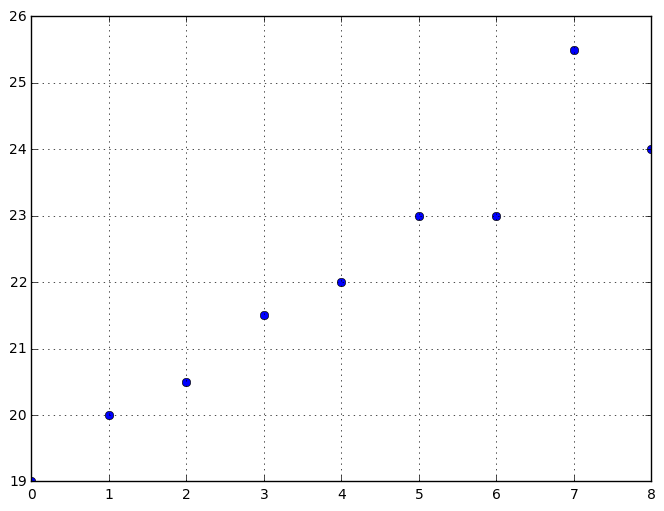

In [2]:
figure(figsize=[8,6])
x = arange(0,9)
y = np.array([[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]]).T
plot(x,y,'bo');
grid()

* These points are close to a straight line trending upwards. We would like to find that line. 

* The line is described by a function of the form: $f_{w_0,w_1}(x) \doteq w_0+w_1 x$

* our goal is to find $w_0$ and $w_1$.

* In a previous notebook we saw how to find a line that passes through 2 points.

* As here we have more than two points the system is **overconstrained** - there is no straight line that passes through all of the points.

* The points do not fall **exactly** on a line.  
So we are looking for $w_0,w_1$  
such that the line is **closest** to the points.

We define the **Square difference** between the line $f_{w_0,w_1}$ and the points
$\langle (x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n) \rangle$ to be 
$$\sum_{i=1}^n [f_{w_0,w_1}(x_i)-y_i]^2$$
(In our example $n=9$)

The values of $w_0,w_1$ which  
minimize the square difference,  
are called the **least squares** solution.

We use matrix notation and `numpy.linalg` to find the optimal vector ${\bf w}=[w_0,w_1]$

${\bf A}$ is an $n$ by $2$ matrix:
$${\bf A} =  \begin{pmatrix}
 1, x_1\\
 \vdots\\
 1, x_n
 \end{pmatrix} 
$$

 ${\bf y}$ and ${\bf w}$ are column vectors:
 $${\bf y} =  \begin{pmatrix}
 y_1\\
 \vdots\\
 y_n
 \end{pmatrix} 
 ,\;\;\;\;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$$

We can then express the differences as a vector ${\bf d}$:
$$ {\bf d} = {\bf A} {\bf w} - {\bf y} $$

The square difference, that we wish to minimize, is equal to the square of the norm of ${\bf d}$. 

Our goal is to find ${\bf w}$ that minimizes  
$\|{\bf d}\|_2^2 = \sum_{i=1}^n d_i^2$

In [3]:
A = array([ ones(9),x ]).T
print 'A.T=\n',A.T
print 'y.T=\n',y.T
A.shape,y.shape 


A.T=
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.]]
y.T=
[[ 19.   20.   20.5  21.5  22.   23.   23.   25.5  24. ]]


((9, 2), (9, 1))

In [4]:
# linearly generated sequence
w = linalg.lstsq(A,y)[0] # obtaining the parameters
w

array([[ 19.18888889],
       [  0.71666667]])

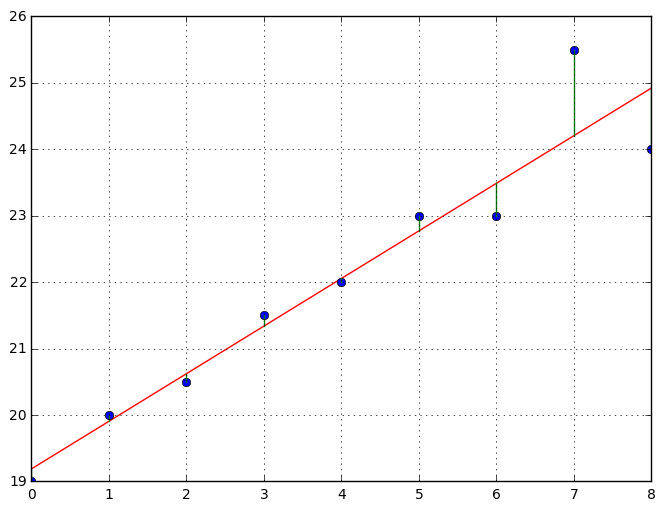

In [5]:
# plotting the line and the square differences
figure(figsize=[8,6])
line = w[0]+w[1]*x # regression line
plot(x,line,'r-',x,y,'o')

for i in range(len(x)):
    plot([x[i],x[i]],[y[i],w[1]*x[i]+w[0]],'g')
grid()

## A real-life example
We now turn our attention to the analysis of some real-word data. This data describes  the weight and height of some 25,000 people.

Weight/Weight data downloaded from [here](https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html) (Data is available as part of the download).

In [7]:
HW=pd.read_csv('data/HW25000.csv')
HW=HW.iloc[:,1:]
HW.columns=['Height','Weight']
HW.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [8]:
# Copute some basic descritive statistics.
HW.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [9]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A])
y=np.array(HW['Weight'])
A.shape,y.shape

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w1

array([-82.57574306,   3.08347645])

In [10]:
def f(x,w):
    return w[0]+w[1]*x

/Users/matt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


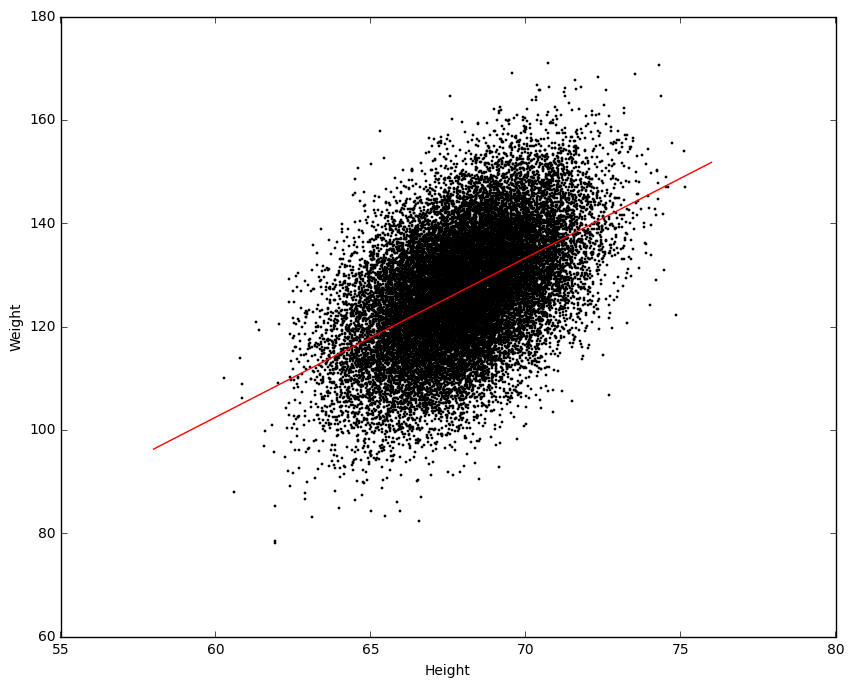

In [11]:
ax=HW.plot(kind='scatter',s=1,x='Height',y='Weight',figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r');

## The graph of averages 

In [12]:
# calculate the mean weight for each 1-inch interval of height.
HW['round_height']=HW['Height'].round()
HW['round_weight']=HW['Weight'].round()

per_height_means=HW.groupby('round_height').mean()[['Weight']]

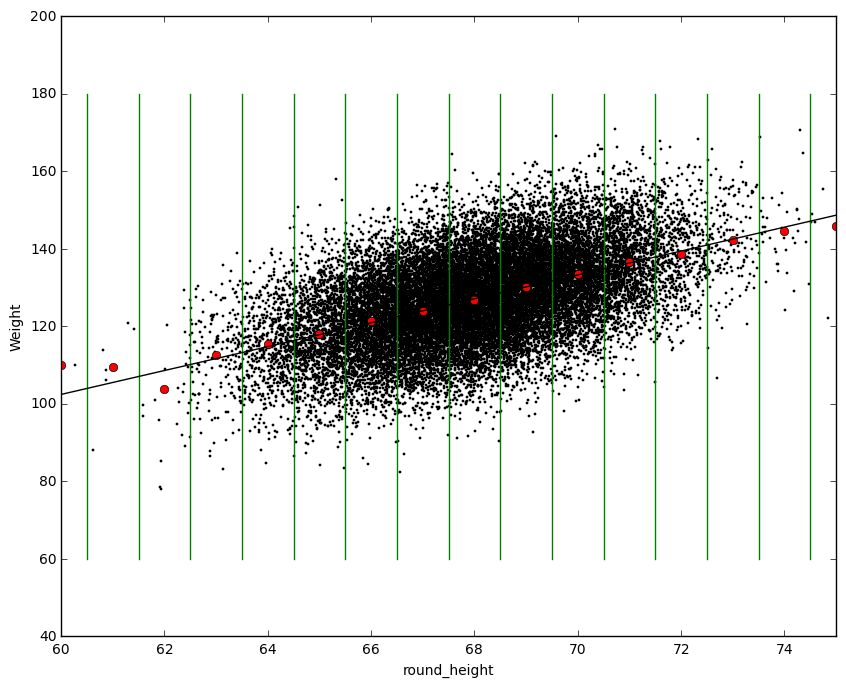

In [13]:
ax=HW.plot(kind='scatter',s=1,x='Height',y='Weight',figsize=[10,8]);
per_height_means.plot(y='Weight',style='ro',ax=ax,legend=False)

_xlim=xlim()
_ylim=ylim()
for _x in arange(_xlim[0]+0.5,_xlim[1],1):
    plot([_x,_x],[_ylim[0],_ylim[1]],'g')

x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k');

## The two regression lines

So far we set our goal to predict the **weight** from the **height**.

We can also go the other way: predicting the **height** from the **weight**

In [14]:
A=np.array(HW['Weight'])
A=np.array([ones(len(A)),A])
y=np.array(HW['Height'])
A.shape,y.shape

w2 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w2

array([ 57.5717099 ,   0.08200701])

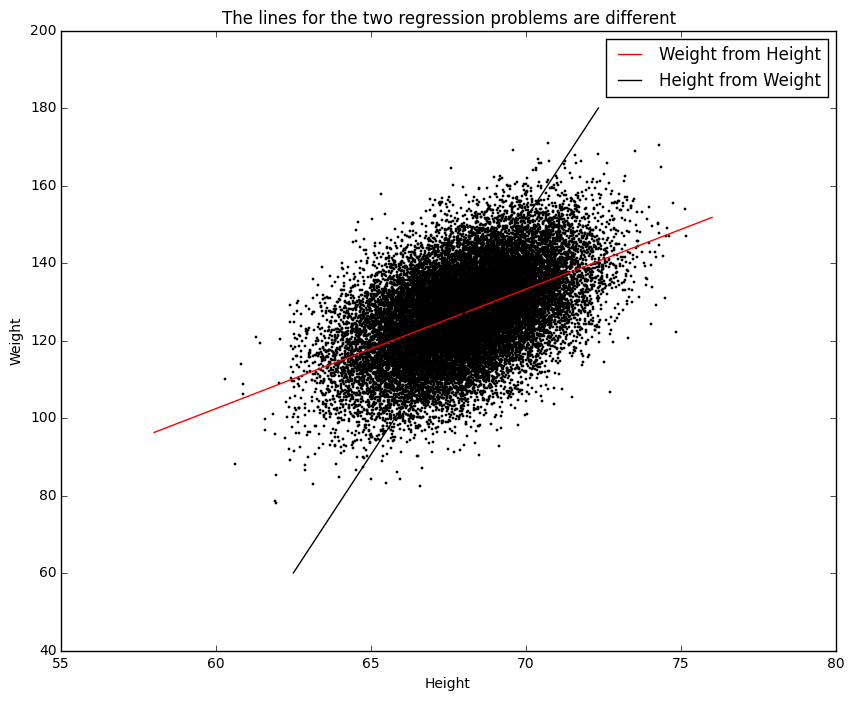

In [15]:
ax=HW.plot(kind='scatter',s=1,x='Height',y='Weight',figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r',label='Weight from Height');

y0,y1=ylim()
ax.plot([f(y0,w2),f(y1,w2)],[y0,y1],'k',label='Height from Weight');
legend();
title('The lines for the two regression problems are different');

# Next video: polynomial regression
This time we talked about **linear** regression, next time we'll extend regression to situations where the relationship is not linear.